## The variance of position

We have already witnessed the truely remarkable fact that even if we know the wave function of a particle we can not with certainty predict where the particle will be deceted if we masure its position (unless the wave function is a $\delta$-function).

Therefore if we repeat an experiment where we measure the position of a particle with a given wave function many times, we will obtain a distribution of the positions where we have detected the particle.

As a first way to describe this distribution we introduced the expectation value of the position, that is, the average of the distribution. The expectation value for the position is a very important quantity, however, the fluctuations about this average position are at least as interesting! A measure for these fluctuations is **the variance of the position** and its square root **the standard deviation**. 

Why is the variance so interesting? Because it has **no classical counterpart**!

**What:** We will set up a spatial wave function and use measurements of the position to compute the variance of the position. 

**Learning objective:** To understand better the variance of position and to get expirence with how it can be measured. 

**Reminder:**

From Griffiths and Schroeter chapter 1 we learned that if we know the wave function $\Psi(x,t)$ for a particle we can compute the variance of the position

\begin{equation}
\sigma_x^2 = \langle x^2 \rangle - \langle x\rangle^2 
\end{equation}

by solving the integrals 

\begin{equation}
\langle x^2 \rangle = \int_{-\infty}^\infty x^2 \, |\Psi(x,t)|^2 dx \ 
\end{equation}

and

\begin{equation}
\langle x \rangle = \int_{-\infty}^\infty x \, |\Psi(x,t)|^2 dx \ .
\end{equation}

But how would we measure this variance in an experiment?

Obviously the best way to understand is to set up an experiment and measure the variance. So let's give it a try!

**The wave function:** 

We will again think of each qubit as a possible position in a discrete space with 6 sites and fix time to $t=0$. So our wave function will be $\Psi(x_j,t=0)$ where $x_j=aj$ with $j=0,1,2,3,4,5$ are the possible discrete positions (as always on IBM Q the counting starts with 0.)

Here we consider will consider the two wave functions $\Psi_1$ and $\Psi_2$

\begin{eqnarray}
\Psi_1(x_0,t=0) & = & 0 \\ 
\Psi_1(x_1,t=0) & = & 0 \\
\Psi_1(x_2,t=0) & = & 1/\sqrt{2} \\ 
\Psi_1(x_3,t=0) & = & 1/\sqrt{2} \\ 
\Psi_1(x_4,t=0) & = & 0 \\ 
\Psi_1(x_5,t=0) & = & 0 \ .
\end{eqnarray}

and 


\begin{eqnarray}
\Psi_2(x_0,t=0) & = & 0 \\ 
\Psi_2(x_1,t=0) & = & 1/2 \\
\Psi_2(x_2,t=0) & = & 1/2 \\ 
\Psi_2(x_3,t=0) & = & 1/2 \\ 
\Psi_2(x_4,t=0) & = & 1/2 \\ 
\Psi_2(x_5,t=0) & = & 0 \ .
\end{eqnarray}



**Exercise 1:** In which state do you expect that we will observe the largest variance? (No calculations allowed.)

OK, let's get on with the experiments! As always we first import the relevant libraries:

In [3]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import assemble

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-21 09:20:16,290: Credentials are already in use. The existing account in the session will be replaced.


.. and define the routines that allow us to set up the wave function 

In [4]:
#initialising a quantum circuit. 
def initial(N,M):
    q = QuantumRegister(N) #N is th number of q-bits
    c = ClassicalRegister(M) #M is the number of bits
    qc = QuantumCircuit(q,c)
    return qc


#make desired vector: 
def state(liste,qc): 
    C = np.array(liste) #len(C) is the number of states. 

    N = len(C)
    H_d = 2**N
    
    fullstate = np.zeros(H_d)
    for k in range(N):
        fullstate[(1 << k) ]+=C[k]
        
    norm = np.linalg.norm(fullstate)
    fullstate = fullstate/norm
    return qc.initialize(fullstate.tolist(), qc.qubits)


Now let's set up the first experiment with $\Psi_1$:

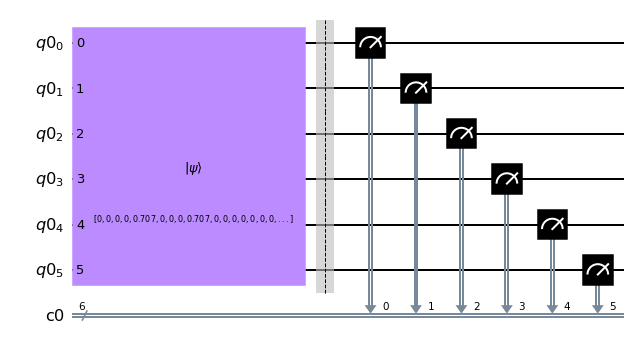

In [5]:
N=6
qc = initial(N,N)

state([0,0,1/np.sqrt(2),1/np.sqrt(2),0,0],qc)

qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.draw()

... and run the experiment 1024 times to compute the variance

In [14]:
simulator = Aer.get_backend('aer_simulator')
shots=1024
result = simulator.run(qc, shots=shots, memory=True).result()
memory = result.get_memory(qc)
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
av=0
for x in memory:
    position = y.index(x)
    av+=position/shots
var=0
for x in memory:
    position = y.index(x)
    var+=(position-av)**2/shots
print("For our first wave function")
print()
print("Expectation value of postion:", round(av,2),"a")
print()
print("Variance of postion:", round(var,2),"a^2")
print()
sigma = np.sqrt(var)
print("Standard deviation of postion:", round(sigma,3),"a")

For our first wave function

Expectation value of postion: 2.51 a

Variance of postion: 1.31 a^2

Standard deviation of postion: 1.144 a


**Note:** We have also given the standard deviation, $\sigma$, which is simply the square root of the variance.

**Don't miss:** The unit of the variance of position is length$^2$, so the standard deviation has units of length. Hence it is the standard deviation which measures the width of the distribution of the wave function. 

**Exercise 2:** Compute the variance of the position in the state $\Psi_1$ analytically and compare to the experimental value just obtained.

**Exercise 3:** Prediction: Compute the variance of the position in the state $\Psi_2$. 

**Check:** Did your results confirm your expectation from Exercise 1?

Now let's repeat the experiment only now the particle has the state $\Psi_2$.

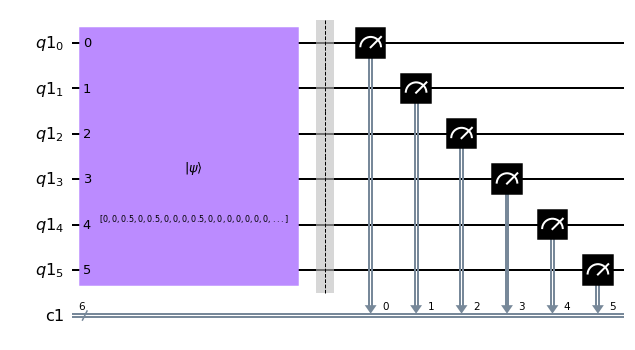

In [12]:
N=6
qc = initial(N,N)

state([0,1/2,1/2,1/2,1/2,0],qc)

qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.draw()

In [15]:
simulator = Aer.get_backend('aer_simulator')
shots=1024
result = simulator.run(qc, shots=shots, memory=True).result()
memory = result.get_memory(qc)
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
av=0
for x in memory:
    position = y.index(x)
    av+=position/shots
var=0
for x in memory:
    position = y.index(x)
    var+=(position-av)**2/shots
print("For our second wave function")
print()
print("Expectation value of postion:", round(av,2),"a")
print()
print("Variance of postion:", round(var,2),"a^2")
print()
sigma = np.sqrt(var)
print("Standard deviation of postion:", round(sigma,3),"a")

For our second wave function

Expectation value of postion: 2.57 a

Variance of postion: 1.22 a^2

Standard deviation of postion: 1.105 a


**Check:** Did the value of the variance just obtained correspond to your perdiction from Exercise 3?

**Take home:** The variance of the position describes the magnitude of the fluctuations of the detected positions about the expectation value of the position. It is a purely quntum mechanical quantity, which describes that even if we know the wave function we can not with certainty know where the particle will be detected. To know the wave function of a quantum particle corresponds in classical physics to know its position and momentum. In classical physics the corresponding variance therefore is always be zero (we know where the particle is and we will detect it there). Of course there can be experimental errors, but that is an entirely different story. The variance we have computed here is a true physical quantity and not due to imperfections of the experiment.

**Extra:** Suppose the particle instead had the wave function
\begin{eqnarray}
\Psi_3(x_0,t=0) & = & 0 \\ 
\Psi_3(x_1,t=0) & = & 1/2 \\
\Psi_3(x_2,t=0) & = & -1/2 \\ 
\Psi_3(x_3,t=0) & = & 1/2 \\ 
\Psi_3(x_4,t=0) & = & -1/2 \\ 
\Psi_3(x_5,t=0) & = & 0 \ .
\end{eqnarray}
What would have happened to the variance? 

**Check** your result by changing the relevant signs in the command state([...],qc) in the code below Exercise 3 and run the experiment again.